## Desafio Final

In [1]:
# imports de avisos
import sys
import warnings
import matplotlib.cbook
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# imports para manipulação de dados
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import math
import itertools

# imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [2]:
# função para criar um gráfico de distribuição pra cada feature do dataset
def plot_distribution(dataset, cols=5, width=20, height=25, hspace=0.4, wspace=0.5):
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, 
                              data=dataset,
                              order=dataset[column].value_counts().index[:10])
            substrings = [s.get_text()[:20] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)        
            
# função para calcular o coeficiente de correlação entre duas variáveis
def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2    

In [3]:
# carregando o dataset
df_cars = pd.read_csv('cars.csv')

In [4]:
# apresentando as 5 primeiras linhas do dataset
df_cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [5]:
# mostrando as dimensões do dataset
df_cars.shape

(261, 8)

In [6]:
# verificando os tipos de variáveis e se existem ou não valores nulos
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [7]:
df_cars.dtypes.value_counts()

int64      4
object     3
float64    1
dtype: int64

#### Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar que:

- Não foram encontrados valores nulos após a leitura dos dados. 

In [8]:
display(df_cars.isna().sum())
display(df_cars.isnull().sum())

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

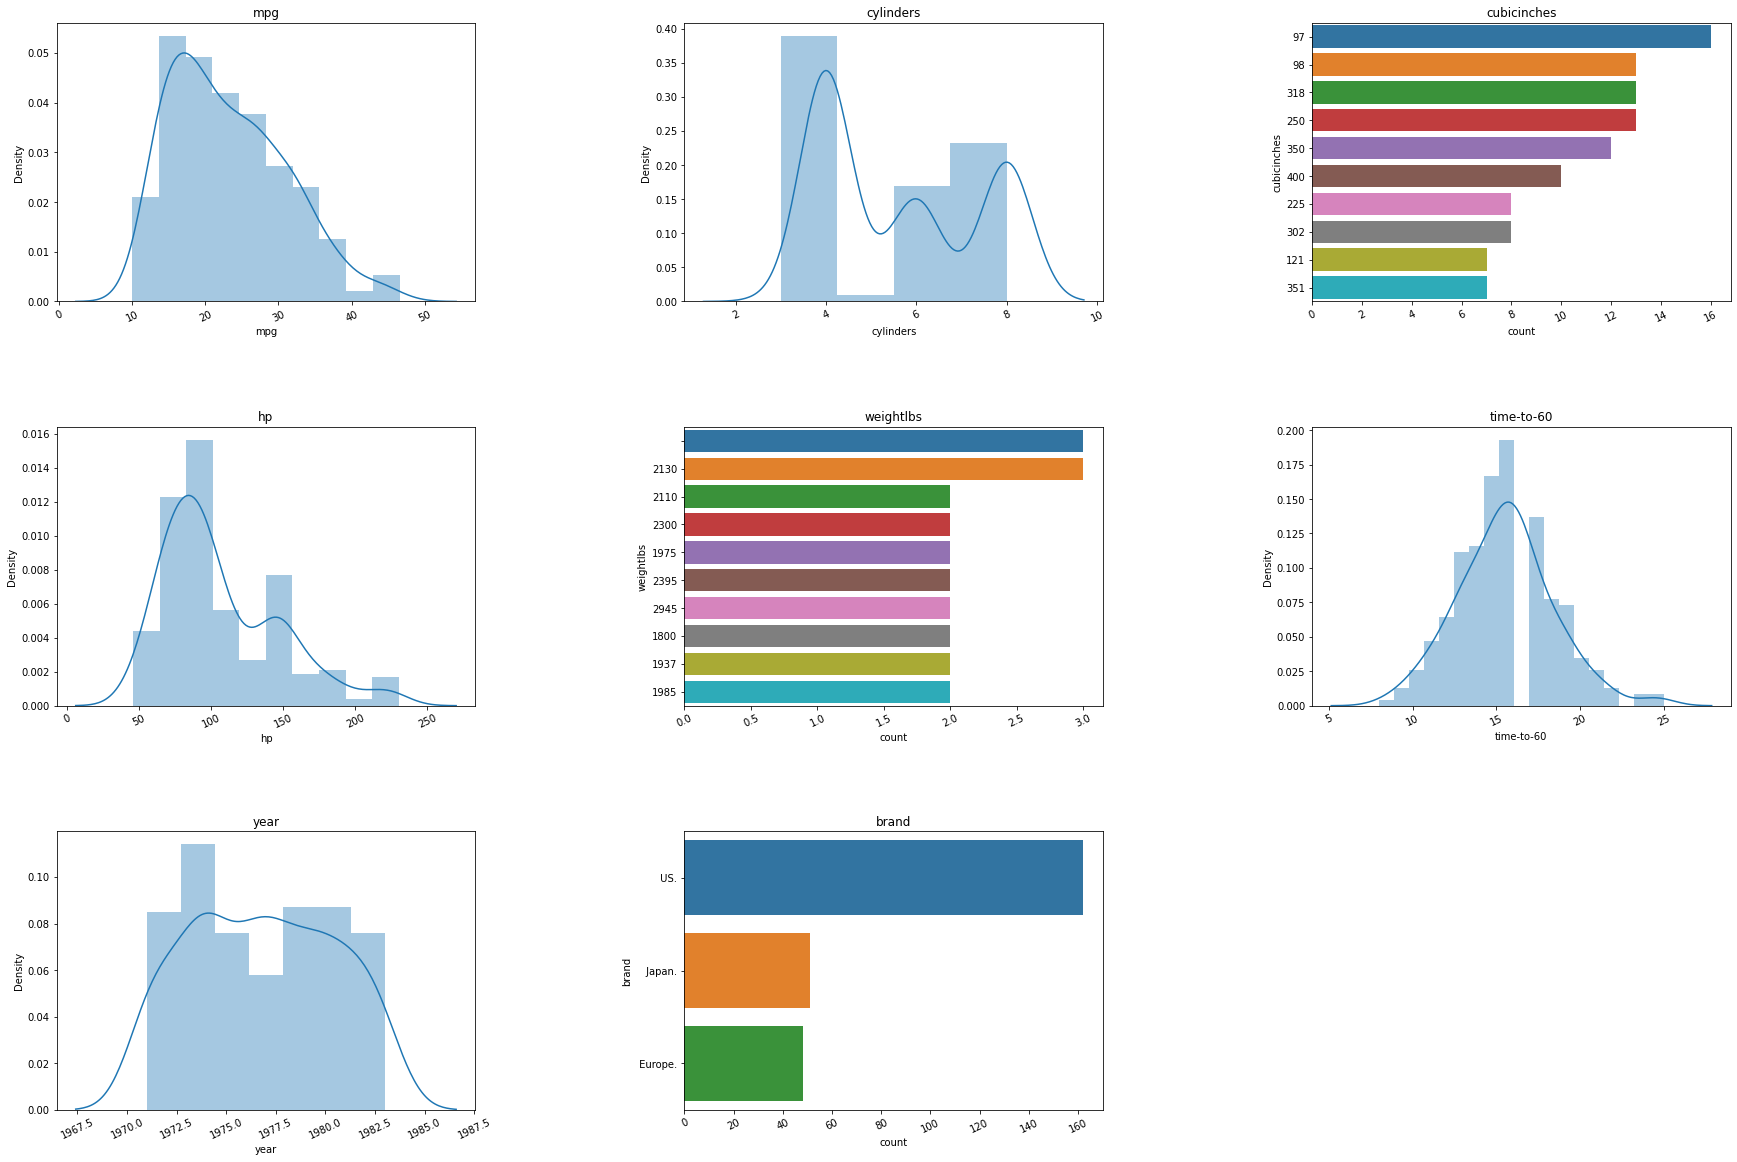

In [9]:
# gráfico de distribuição para cada feature do dataset
columns = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year', 'brand']
plot_distribution(df_cars[columns], cols=3, width=30, height=20, hspace=0.45, wspace=0.5)

#### Realize a transformação das colunas *“cubicinches”* e *“weightlbs”* do tipo “string” para o tipo numérico utilizando o *pd.to_numeric()* e o parâmetro  *errors='coerce'*. Após essa transformação, é CORRETO afirmar:

- Essa transformação adiciona valores nulos ao nosso dataset.

In [10]:
df_cars['cubicinches'] = pd.to_numeric(df_cars['cubicinches'], errors='coerce')
df_cars['weightlbs'] = pd.to_numeric(df_cars['weightlbs'], errors='coerce')
df_cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

#### Indique quais eram os índices dos valores presentes no dataset que *“forçaram”* o pandas a compreender a variável *“cubicinches”* como string.

In [11]:
df_cars[df_cars['cubicinches'].isna()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,US.
180,19.8,6,NaN,85,2990.0,18,1980,US.


In [12]:
index_null = df_cars['cubicinches'].isna()
index_null[index_null.isin([True])].index

Int64Index([40, 180], dtype='int64')

#### Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?

In [13]:
df_cars.isna().sum().sum()

5

#### Substitua os valores nulos introduzidos no dataset após a transformação pelo valor médio das colunas. Qual é o novo valor médio da coluna *“weightlbs”*?

In [14]:
df_cars['cubicinches'].fillna(df_cars['cubicinches'].mean(), inplace=True)
df_cars['weightlbs'].fillna(df_cars['weightlbs'].mean(), inplace=True)
df_cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [15]:
df_cars['weightlbs'].mean()

3009.8333333333335

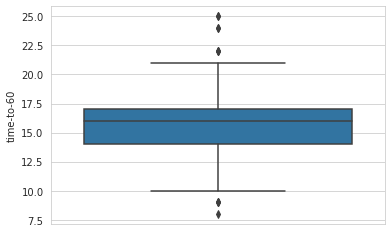

In [16]:
# verificando os dados da feature 'time-to-60' através de um boxplot
sns.set_style("whitegrid")  
sns.boxplot(y='time-to-60', data=df_cars)

#### Após substituir os valores nulos pela média das colunas, selecione as colunas *“mpg”, “cylinders”, “cubicinches”, “hp”, “weightlbs”, “time-to-60”, “year”*. Qual é o valor da mediana para a característica *“mpg”*?

In [17]:
df_cars2 = df_cars[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]
df_cars2.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [18]:
df_cars2['mpg'].median()

22.0

#### Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável *“time-to-60”*?

- 75% dos dados são maiores que o valor de 14,00.

In [19]:
df_cars['time-to-60'].describe()

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

#### Sobre o coeficiente de correlação de Pearson entre as variáveis *“cylinders”* e *“mpg”*, é correto afirmar, EXCETO:

- Mesmo não sendo igual a 1, é possível dizer que à medida que a variável *“cylinders”* aumenta, a variável *“mpg”* reduz em uma direção oposta.
- Caso fosse calculado o coeficiente de determinação entre essas duas variáveis, o valor seria, aproximadamente, 0,6.
- Quando um coeficiente de correlação de Pearson é igual a 1, o coeficiente de determinação também será igual a 1. 
- **Mesmo não sendo igual a 1, é possível dizer que à medida em que a variável *“cylinders”* aumenta, a variável *“mpg”* também aumenta na mesma direção.**

<Figure size 720x360 with 0 Axes>

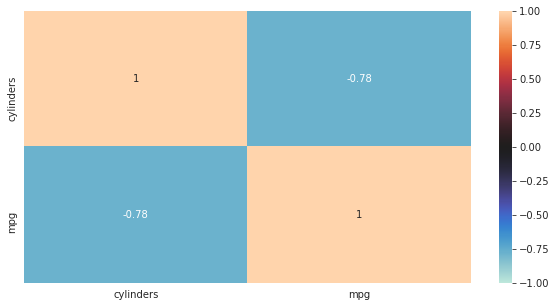

In [20]:
plt.figure(figsize=(10, 5))
matriz_de_correlação = df_cars[['cylinders','mpg']].corr()
sns.heatmap(matriz_de_correlação, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

<Figure size 1296x576 with 0 Axes>

Text(0.5, 0, 'cylinders')

Text(0, 0.5, 'mpg')

Text(0.5, 1.0, 'Relação entre "cylinders" e "mpg"')

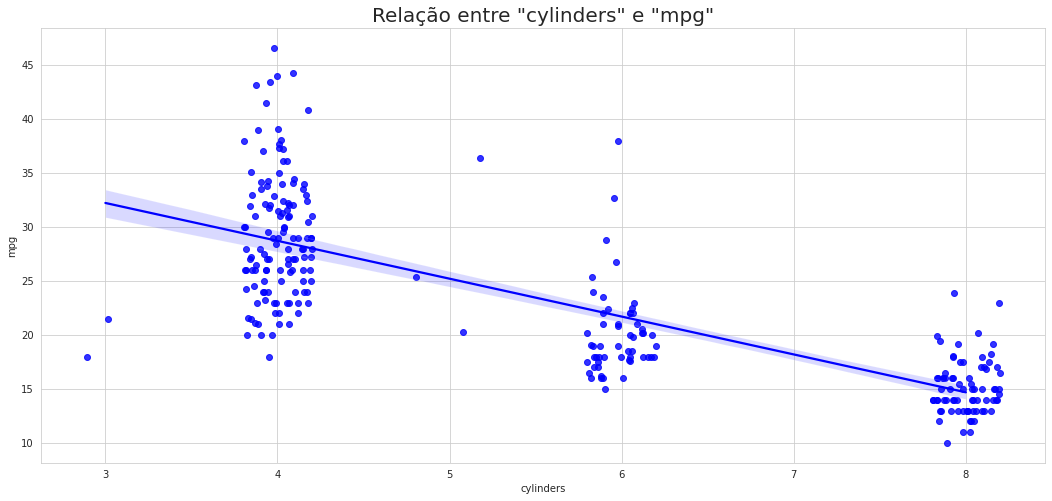

In [21]:
# visualiza um gráfico entre as variaveis "cylinders" e "mpg" e verifica se existe alguma correlação linear
plt.figure(figsize=(18, 8))
sns.regplot(x='cylinders', y='mpg', data=df_cars, color='b', x_jitter=0.2)
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.title('Relação entre "cylinders" e "mpg"', fontsize=20)
plt.show()

In [22]:
# calculando o coeficiente de correlação entre "cylinders" e "mpg" através do r2
rsquared(df_cars['cylinders'], df_cars['mpg'])

0.6032782423312325

#### Sobre o boxplot da variável *“hp”*, é correto afirmar, EXCETO:

- Através do boxplot, é possível perceber que a mediana encontra-se entre os valores de 80 e 100.
- **Existe uma maior dispersão no segundo quartil quando comparamos com o terceiro.**
- Não foi identificada a presença de possíveis outliers nos dados. 
- Cada um dos quartis possui a mesma quantidade de valores para a variável *“hp”*.

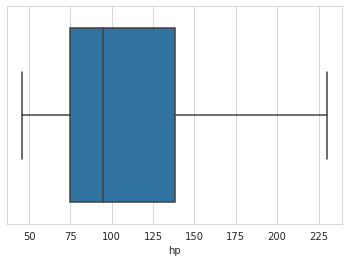

In [23]:
sns.boxplot(x=df_cars['hp'])

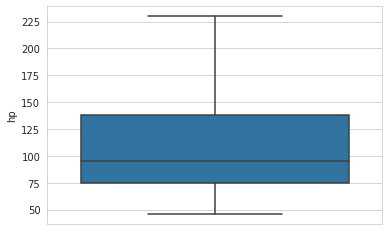

In [24]:
# verificando os dados da feature 'hp' através de um boxplot
sns.set_style("whitegrid")  
sns.boxplot(y='hp', data=df_cars)

### Pré-processamento

In [25]:
# normalização dos dados
from sklearn.preprocessing import StandardScaler
normaliza = StandardScaler() 

# definindo somente colunas numéricas a serem normalizadas
num_cols = df_cars.columns[df_cars.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

# criando uma cópia do dataset original
df_cars4 = df_cars[num_cols]

# normalizando os dados
df_cars4[num_cols] = normaliza.fit_transform(df_cars4[num_cols])

# exibindo os primeiros registros
df_cars4.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025


#### Após normalizado, utilizando a função *StandardScaler()*, qual é o maior valor para a variável *“hp”*?

In [26]:
# verificando o maior valor para a feature "hp"
df_cars4['hp'].max()

3.05870398977614

#### Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada pelo primeiro componente principal?

In [27]:
# criando o objeto PCA com 7 componentes
from sklearn.decomposition import PCA
pca = PCA(n_components=7)

# realizando o fit com os dados normalizados
principalComponents = pca.fit_transform(df_cars4)

# salvando em um dataframe
PCA_components = pd.DataFrame(principalComponents)
PCA_components.head()

,0,1,2,3,4,5,6
0,3.485219,0.526326,-0.139738,0.258792,0.086902,-0.179206,0.079078
1,-2.176912,-0.285424,-1.304613,-0.100465,-0.289698,-0.041147,-0.013127
2,2.684973,1.046946,-0.732156,0.498227,-0.535168,-0.075745,0.159956
3,3.534648,0.847619,-0.801334,0.506630,-0.435696,-0.144237,-0.483162
4,-2.299222,0.194808,-0.221704,0.079650,-0.175655,0.015566,-0.069958


In [28]:
# exibindo o valor da variância explicada por cada componente
print(pca.explained_variance_ratio_)

[0.72371349 0.12675138 0.09126131 0.02773591 0.01766794 0.00798425
 0.00488572]


<BarContainer object of 7 artists>

Text(0.5, 0, 'PCA features')

Text(0, 0.5, 'variance %')

([<matplotlib.axis.XTick at 0x7fd57e8ebe10>,
 <a list of 7 Text major ticklabel objects>)

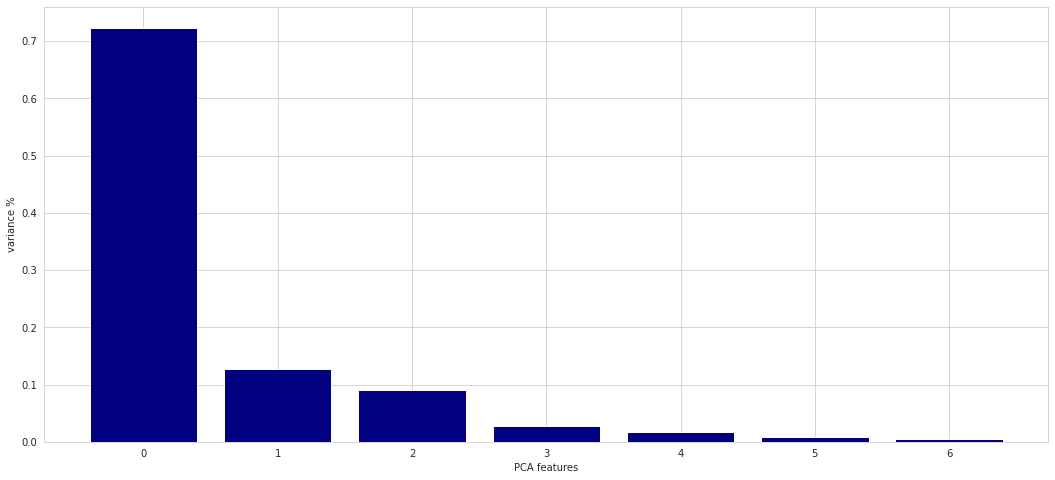

In [29]:
# plot da variação explicada pelos componentes
features = range(pca.n_components_)

fig, aux = plt.subplots(1, 1, figsize=(18, 8))
plt.bar(features, pca.explained_variance_ratio_, color='navy')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

### Algoritmo K-Means

#### Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar que:

- Cada um dos clusters possui características próprias.
- **Todos os clusters possuem a mesma quantidade de elementos.**
- Existem 3 centroides após a aplicação da clusterização.
- Os centroides, utilizando apenas as 3 componentes principais, possuem 3 dimensões.

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

# treinando o modelo utilizando apenas os três primeiros componentes principais
kmeans.fit(PCA_components.iloc[:,:3])

# realizando as previsões dos cluster
x_clustered = kmeans.predict(PCA_components.iloc[:,:3])

# definindo um mapa de cor para cada cluster
color_map = {0:'r', 1: 'g', 2: 'b'}
label_color = [color_map[l] for l in x_clustered]

# definindo os centróides
centers = np.array(kmeans.cluster_centers_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Kmeans com centróides')

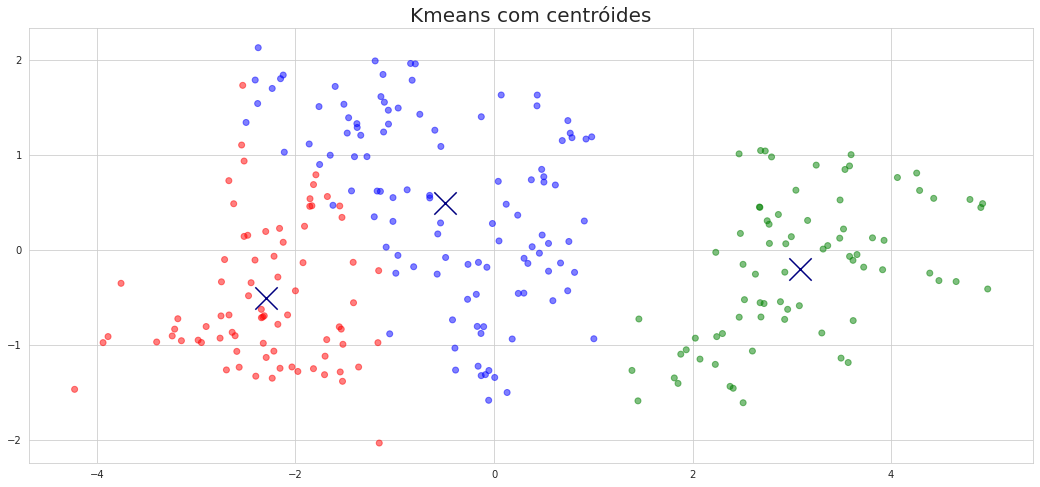

In [31]:
# exibindo um gráfico scatter
fig, aux = plt.subplots(1, 1, figsize=(18, 8))
plt.title('Kmeans com centróides', fontsize=20)
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=label_color, alpha=0.5) 
plt.scatter(centers[:,0], centers[:,1], marker="x", color='navy', s=500)
plt.show()

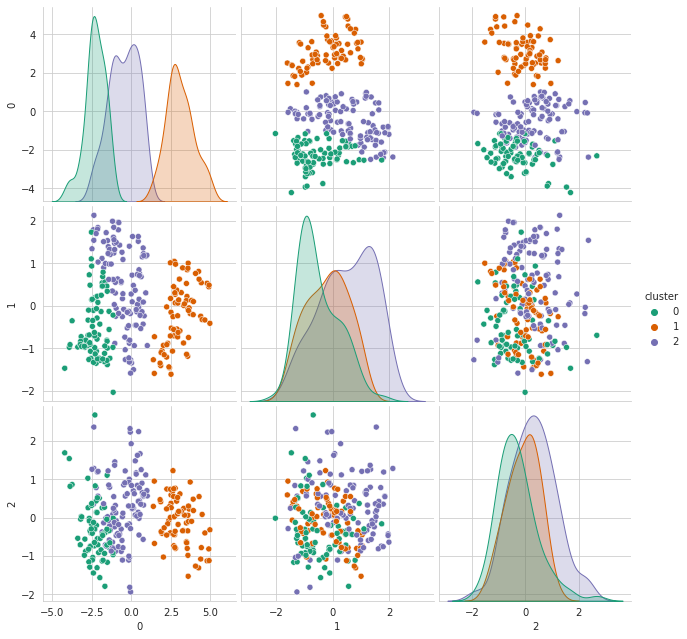

In [32]:
# criando um dataframe do nosso PCA
df = pd.DataFrame(PCA_components)

# selecionando somente os 3 primeiros componentes
df = df[[0,1,2]]
df['cluster'] = x_clustered

# visualizando nossos clusters com os dados do PCA
sns.pairplot(df, hue='cluster', palette='Dark2', diag_kind='kde', height=3)

2    109
0     77
1     75
Name: cluster, dtype: int64


Text(0, 0.5, 'Count')

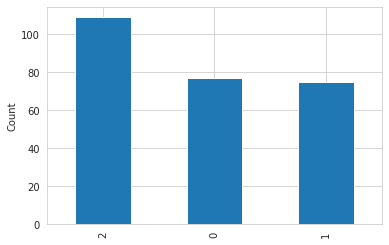

In [33]:
# verificando a quantidade em cada um dos clusters
print(df['cluster'].value_counts())

# exibindo em um gráfico
df['cluster'].value_counts().plot(kind ='bar')
plt.ylabel('Count')

### Árvore de Decisão

#### Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (*“mpg” > 25*) devem ser considerados eficientes. Utilize as colunas *“cylinders”, “cubicinches”, “hp”, “weightlbs”, “time-to-60”* como entradas e como saída a coluna de eficiência criada.
#### Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?

In [34]:
# realizando o merge com o dataset original e do pca, gerando um novo dataset
df_final = df_cars.merge(df, left_index=True, right_index=True)

# cria a nova feature "mpg"
df_final['efficiency'] = np.where(df_final['mpg'] > 25, 1, 0)

# Exibir o dataset final
df_final.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,0,1,2,cluster,efficiency
0,14.0,8,350.0,165,4209.0,12,1972,US.,3.485219,0.526326,-0.139738,1,0
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,-2.176912,-0.285424,-1.304613,0,1
2,17.0,8,302.0,140,3449.0,11,1971,US.,2.684973,1.046946,-0.732156,1,0
3,15.0,8,400.0,150,3761.0,10,1971,US.,3.534648,0.847619,-0.801334,1,0
4,30.5,4,98.0,63,2051.0,17,1978,US.,-2.299222,0.194808,-0.221704,0,1


In [35]:
y = df_final['efficiency']
x = df_final[['cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60']]

normaliza = StandardScaler() 
x = normaliza.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42) 

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(182, 5) (182,) (79, 5) (79,)


In [36]:
# aplicando um modelo de classificação via árvore de decisão
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier(random_state = 42) 
clf_arvore.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [37]:
# realiza a previsão com os dados
y_pred_arvore = clf_arvore.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_pred_arvore)
print('Acurácia da Árvore de Decisão: ', acuracia)

Acurácia da Árvore de Decisão:  0.8734177215189873


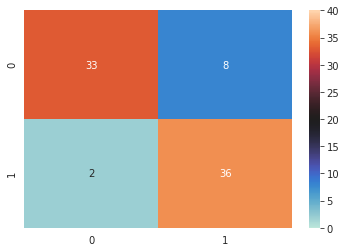

In [39]:
# realiza o plot da matriz de confusão com o seaborn
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_pred_arvore)
sns.heatmap(matriz_confusao, annot=True, vmin=0, vmax=40, center=20)
plt.show()

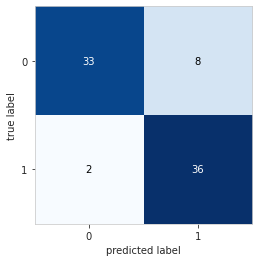

In [40]:
# realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

In [41]:
print(classification_report(y_test, y_pred_arvore))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



#### Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostrado anteriormente, é INCORRETO afirmar:

- A matriz de confusão se constitui em uma estratégia ainda mais importante quando um dataset não está balanceado.
- A diagonal principal da matriz mostra as instâncias em que as previsões foram corretas.
- **Existem duas vezes mais veículos considerados não eficientes que instâncias de veículos eficientes.**
- Os falso-positivos correspondem a instâncias em que o algoritmo considerou a previsão como verdadeira e, na realidade, ela era falsa.

### Regressão Logística

#### Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho.
#### Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar que:

- Como os dois modelos obtiveram um resultado superior a 80% de acurácia, a escolha sobre qual utilizar deve e pode ser feita a partir de outros critérios, como a complexidade do modelo.
- **A regressão logística não deveria ser aplicada ao problema, pois ela trabalha apenas com dados categóricos.**
- A acurácia de ambos os modelos foi superior a 80%.
- A árvore de decisão e a regressão logística podem ser utilizadas para previsão em regressões.

In [42]:
# aplicando um modelo de classificação via regressão logística
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state = 42)
clf_log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# realiza a previsão com os dados
y_pred_log = clf_log.predict(x_test)

In [44]:
acuracia = accuracy_score(y_test, y_pred_log)
print('Acurácia da Regressão Logística: ', acuracia)

Acurácia da Regressão Logística:  0.8607594936708861


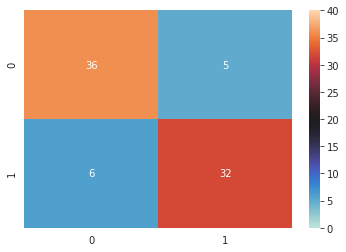

In [45]:
# realiza o plot da matriz de confusão com o seaborn
matriz_confusao = confusion_matrix(y_test, y_pred_log)
sns.heatmap(matriz_confusao, annot=True, vmin=0, vmax=40, center=20)
plt.show()

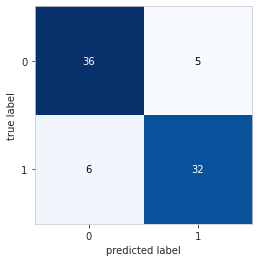

In [46]:
# realiza o plot da matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

In [47]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.86      0.84      0.85        38

    accuracy                           0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.86      0.86      0.86        79

